In [8]:
import data_manager
import os
import sys
import logging
import settings
from policy_learner import PolicyLearner


stock_code = '005930'  # 삼성전자

# 로그 기록
log_dir = os.path.join(settings.BASE_DIR, 'logs/%s' % stock_code)
timestr = settings.get_time_str()
if not os.path.exists('logs/%s' % stock_code):
    os.makedirs('logs/%s' % stock_code)
file_handler = logging.FileHandler(filename=os.path.join(
    log_dir, "%s_%s.log" % (stock_code, timestr)), encoding='utf-8')
stream_handler = logging.StreamHandler(sys.stdout)
file_handler.setLevel(logging.DEBUG)
stream_handler.setLevel(logging.INFO)
logging.basicConfig(format="%(message)s",
                    handlers=[file_handler, stream_handler], level=logging.DEBUG)


import data_manager
from policy_learner import PolicyLearner


In [9]:
chart_data = data_manager.load_chart_data(
        os.path.join(settings.BASE_DIR,
                     'data/chart_data/{}.csv'.format(stock_code)))
prep_data = data_manager.preprocess(chart_data)
training_data = data_manager.build_training_data(prep_data)

In [10]:
training_data = training_data[(training_data['date'] >= '2017-01-01') &
                                  (training_data['date'] <= '2017-12-31')]
training_data = training_data.dropna()

training_data.head()

,date,open,high,low,close,volume,close_ma5,volume_ma5,close_ma10,volume_ma10,close_ma20,volume_ma20,close_ma60,volume_ma60,close_ma120,volume_ma120,open_lastclose_ratio,high_close_ratio,low_close_ratio,close_lastclose_ratio,volume_lastvolume_ratio,close_ma5_ratio,volume_ma5_ratio,close_ma10_ratio,volume_ma10_ratio,close_ma20_ratio,volume_ma20_ratio,close_ma60_ratio,volume_ma60_ratio,close_ma120_ratio,volume_ma120_ratio
8551,2017-01-02,1799000,1812000,1794000,1805000,93012,1798400.0,113228.0,1799500.0,125199.1,1782500.0,169879.85,1.673033e+06,240127.250000,1.624350e+06,244302.466667,-0.001665,0.003878,-0.006094,0.001665,-0.381277,0.003670,-0.178542,0.003056,-0.257087,0.012623,-0.452484,0.078879,-0.612655,0.111214,-0.619275
8552,2017-01-03,1814000,1831000,1801000,1824000,147153,1803600.0,123364.2,1802400.0,129042.8,1787800.0,168752.90,1.675433e+06,234148.700000,1.627142e+06,243185.941667,0.004986,0.003838,-0.012610,0.010526,0.582086,0.011311,0.192834,0.011984,0.140343,0.020248,-0.127997,0.088674,-0.371540,0.120984,-0.394895
8553,2017-01-04,1825000,1826000,1805000,1808000,159435,1805400.0,136637.4,1802000.0,129755.9,1790800.0,162722.85,1.679817e+06,223996.900000,1.630008e+06,242677.116667,0.000548,0.009956,-0.001659,-0.008772,0.083464,0.001440,0.166847,0.003330,0.228730,0.009605,-0.020205,0.076308,-0.288227,0.109197,-0.343016
8554,2017-01-05,1803000,1803000,1777000,1778000,219349,1803400.0,153855.6,1799300.0,138586.6,1791100.0,164086.65,1.683867e+06,214623.200000,1.632483e+06,242836.708333,-0.002765,0.014061,-0.000562,-0.016593,0.375790,-0.014085,0.425681,-0.011838,0.582758,-0.007314,0.336788,0.055903,0.022019,0.089138,-0.096722
8555,2017-01-06,1809000,1822000,1802000,1810000,177619,1805000.0,159313.6,1799400.0,143639.3,1792100.0,156505.05,1.688083e+06,210295.333333,1.635067e+06,242245.158333,0.017435,0.006630,-0.004420,0.017998,-0.190245,0.002770,0.114902,0.005891,0.236563,0.009988,0.134909,0.072222,-0.155383,0.106989,-0.266780


In [11]:
# 차트 데이터 분리
features_chart_data = ['date', 'open', 'high', 'low', 'close', 'volume']
chart_data = training_data[features_chart_data]

chart_data.head()

,date,open,high,low,close,volume
8551,2017-01-02,1799000,1812000,1794000,1805000,93012
8552,2017-01-03,1814000,1831000,1801000,1824000,147153
8553,2017-01-04,1825000,1826000,1805000,1808000,159435
8554,2017-01-05,1803000,1803000,1777000,1778000,219349
8555,2017-01-06,1809000,1822000,1802000,1810000,177619


In [12]:
 # 학습 데이터 분리
features_training_data = [
        'open_lastclose_ratio', 'high_close_ratio', 'low_close_ratio',
        'close_lastclose_ratio', 'volume_lastvolume_ratio',
        'close_ma5_ratio', 'volume_ma5_ratio',
        'close_ma10_ratio', 'volume_ma10_ratio',
        'close_ma20_ratio', 'volume_ma20_ratio',
        'close_ma60_ratio', 'volume_ma60_ratio',
        'close_ma120_ratio', 'volume_ma120_ratio'
    ]
training_data = training_data[features_training_data]

In [13]:
import datetime
datetime.datetime.now()

datetime.datetime(2020, 2, 3, 23, 9, 51, 56462)

LR: 0.001, DF: 0, TU: [1, 10], DRT: 0.2
[Epoch 0001/1000]	Epsilon:0.5000	#Expl.:117/243	#Buy:59	#Sell:61	#Hold:123	#Stocks:4	PV:₩11,466,000	POS:2	NEG:2	Loss:  0.209485
[Epoch 0002/1000]	Epsilon:0.4995	#Expl.:127/243	#Buy:57	#Sell:63	#Hold:123	#Stocks:0	PV:₩14,273,000	POS:4	NEG:0	Loss:  0.180827
[Epoch 0003/1000]	Epsilon:0.4990	#Expl.:127/243	#Buy:64	#Sell:55	#Hold:124	#Stocks:0	PV:₩10,807,000	POS:2	NEG:2	Loss:  0.200050
[Epoch 0004/1000]	Epsilon:0.4985	#Expl.:116/243	#Buy:69	#Sell:64	#Hold:110	#Stocks:0	PV:₩11,886,000	POS:4	NEG:0	Loss:  0.196472
[Epoch 0005/1000]	Epsilon:0.4980	#Expl.:125/243	#Buy:59	#Sell:48	#Hold:136	#Stocks:1	PV:₩11,057,000	POS:4	NEG:0	Loss:  0.195799
[Epoch 0006/1000]	Epsilon:0.4975	#Expl.:123/243	#Buy:67	#Sell:54	#Hold:122	#Stocks:0	PV:₩10,856,000	POS:3	NEG:1	Loss:  0.180611
[Epoch 0007/1000]	Epsilon:0.4970	#Expl.:146/243	#Buy:68	#Sell:58	#Hold:117	#Stocks:0	PV:₩10,206,000	POS:2	NEG:2	Loss:  0.191492
[Epoch 0008/1000]	Epsilon:0.4965	#Expl.:119/243	#Buy:61	#Sell:55

[Epoch 0065/1000]	Epsilon:0.4680	#Expl.:112/243	#Buy:50	#Sell:52	#Hold:141	#Stocks:0	PV:₩13,020,000	POS:4	NEG:0	Loss:  0.174178
[Epoch 0066/1000]	Epsilon:0.4675	#Expl.:123/243	#Buy:75	#Sell:62	#Hold:106	#Stocks:0	PV:₩11,674,000	POS:3	NEG:1	Loss:  0.176822
[Epoch 0067/1000]	Epsilon:0.4670	#Expl.:120/243	#Buy:60	#Sell:59	#Hold:124	#Stocks:0	PV:₩11,627,000	POS:3	NEG:1	Loss:  0.185296
[Epoch 0068/1000]	Epsilon:0.4665	#Expl.:115/243	#Buy:53	#Sell:51	#Hold:139	#Stocks:0	PV:₩10,903,000	POS:3	NEG:1	Loss:  0.184893
[Epoch 0069/1000]	Epsilon:0.4660	#Expl.:108/243	#Buy:59	#Sell:57	#Hold:127	#Stocks:0	PV:₩12,671,000	POS:4	NEG:0	Loss:  0.179475
[Epoch 0070/1000]	Epsilon:0.4655	#Expl.:114/243	#Buy:65	#Sell:61	#Hold:117	#Stocks:2	PV:₩12,755,000	POS:3	NEG:1	Loss:  0.184416
[Epoch 0071/1000]	Epsilon:0.4650	#Expl.:107/243	#Buy:57	#Sell:57	#Hold:129	#Stocks:4	PV:₩12,652,000	POS:3	NEG:1	Loss:  0.186157
[Epoch 0072/1000]	Epsilon:0.4645	#Expl.:112/243	#Buy:62	#Sell:55	#Hold:126	#Stocks:0	PV:₩11,545,000	POS:

[Epoch 0130/1000]	Epsilon:0.4354	#Expl.:107/243	#Buy:68	#Sell:68	#Hold:107	#Stocks:0	PV:₩12,946,000	POS:3	NEG:1	Loss:  0.173502
[Epoch 0131/1000]	Epsilon:0.4349	#Expl.:106/243	#Buy:61	#Sell:64	#Hold:118	#Stocks:0	PV:₩11,708,000	POS:3	NEG:1	Loss:  0.178099
[Epoch 0132/1000]	Epsilon:0.4344	#Expl.:116/243	#Buy:66	#Sell:80	#Hold:97	#Stocks:0	PV:₩14,748,000	POS:4	NEG:0	Loss:  0.158743
[Epoch 0133/1000]	Epsilon:0.4339	#Expl.:96/243	#Buy:74	#Sell:62	#Hold:107	#Stocks:1	PV:₩13,138,000	POS:4	NEG:0	Loss:  0.164596
[Epoch 0134/1000]	Epsilon:0.4334	#Expl.:105/243	#Buy:69	#Sell:61	#Hold:113	#Stocks:0	PV:₩13,689,000	POS:4	NEG:0	Loss:  0.168681
[Epoch 0135/1000]	Epsilon:0.4329	#Expl.:106/243	#Buy:60	#Sell:60	#Hold:123	#Stocks:0	PV:₩13,630,000	POS:4	NEG:0	Loss:  0.164943
[Epoch 0136/1000]	Epsilon:0.4324	#Expl.:111/243	#Buy:71	#Sell:66	#Hold:106	#Stocks:4	PV:₩13,437,000	POS:4	NEG:0	Loss:  0.159884
[Epoch 0137/1000]	Epsilon:0.4319	#Expl.:104/243	#Buy:71	#Sell:64	#Hold:108	#Stocks:0	PV:₩12,540,000	POS:3	

[Epoch 0195/1000]	Epsilon:0.4029	#Expl.:93/243	#Buy:65	#Sell:59	#Hold:119	#Stocks:0	PV:₩13,114,000	POS:4	NEG:0	Loss:  0.167890
[Epoch 0196/1000]	Epsilon:0.4024	#Expl.:99/243	#Buy:63	#Sell:67	#Hold:113	#Stocks:0	PV:₩12,183,000	POS:4	NEG:0	Loss:  0.160989
[Epoch 0197/1000]	Epsilon:0.4019	#Expl.:92/243	#Buy:65	#Sell:63	#Hold:115	#Stocks:0	PV:₩13,377,000	POS:4	NEG:0	Loss:  0.153970
[Epoch 0198/1000]	Epsilon:0.4014	#Expl.:84/243	#Buy:60	#Sell:59	#Hold:124	#Stocks:0	PV:₩13,708,000	POS:4	NEG:0	Loss:  0.147711
[Epoch 0199/1000]	Epsilon:0.4009	#Expl.:101/243	#Buy:58	#Sell:69	#Hold:116	#Stocks:0	PV:₩12,744,000	POS:3	NEG:1	Loss:  0.172838
[Epoch 0200/1000]	Epsilon:0.4004	#Expl.:104/243	#Buy:65	#Sell:59	#Hold:119	#Stocks:1	PV:₩12,997,000	POS:4	NEG:0	Loss:  0.157033
[Epoch 0201/1000]	Epsilon:0.3999	#Expl.:110/243	#Buy:57	#Sell:63	#Hold:123	#Stocks:0	PV:₩13,422,000	POS:4	NEG:0	Loss:  0.145604
[Epoch 0202/1000]	Epsilon:0.3994	#Expl.:92/243	#Buy:68	#Sell:60	#Hold:115	#Stocks:0	PV:₩13,824,000	POS:4	NEG

[Epoch 0260/1000]	Epsilon:0.3704	#Expl.:77/243	#Buy:60	#Sell:58	#Hold:125	#Stocks:5	PV:₩13,325,000	POS:4	NEG:0	Loss:  0.144369
[Epoch 0261/1000]	Epsilon:0.3699	#Expl.:87/243	#Buy:64	#Sell:65	#Hold:114	#Stocks:0	PV:₩11,762,000	POS:3	NEG:1	Loss:  0.158611
[Epoch 0262/1000]	Epsilon:0.3694	#Expl.:82/243	#Buy:54	#Sell:58	#Hold:131	#Stocks:0	PV:₩12,149,000	POS:4	NEG:0	Loss:  0.139540
[Epoch 0263/1000]	Epsilon:0.3689	#Expl.:87/243	#Buy:70	#Sell:73	#Hold:100	#Stocks:0	PV:₩13,760,000	POS:4	NEG:0	Loss:  0.149130
[Epoch 0264/1000]	Epsilon:0.3684	#Expl.:90/243	#Buy:70	#Sell:63	#Hold:110	#Stocks:0	PV:₩13,253,000	POS:3	NEG:1	Loss:  0.165600
[Epoch 0265/1000]	Epsilon:0.3679	#Expl.:89/243	#Buy:71	#Sell:72	#Hold:100	#Stocks:0	PV:₩12,492,000	POS:4	NEG:0	Loss:  0.136895
[Epoch 0266/1000]	Epsilon:0.3674	#Expl.:88/243	#Buy:78	#Sell:61	#Hold:104	#Stocks:5	PV:₩12,983,000	POS:4	NEG:0	Loss:  0.142147
[Epoch 0267/1000]	Epsilon:0.3669	#Expl.:94/243	#Buy:62	#Sell:63	#Hold:118	#Stocks:0	PV:₩12,870,000	POS:3	NEG:1	

[Epoch 0325/1000]	Epsilon:0.3378	#Expl.:92/243	#Buy:71	#Sell:64	#Hold:108	#Stocks:5	PV:₩13,368,000	POS:4	NEG:0	Loss:  0.139883
[Epoch 0326/1000]	Epsilon:0.3373	#Expl.:72/243	#Buy:66	#Sell:65	#Hold:112	#Stocks:1	PV:₩14,931,000	POS:4	NEG:0	Loss:  0.137405
[Epoch 0327/1000]	Epsilon:0.3368	#Expl.:96/243	#Buy:74	#Sell:75	#Hold:94	#Stocks:0	PV:₩15,437,000	POS:4	NEG:0	Loss:  0.149313
[Epoch 0328/1000]	Epsilon:0.3363	#Expl.:78/243	#Buy:64	#Sell:66	#Hold:113	#Stocks:0	PV:₩14,467,000	POS:4	NEG:0	Loss:  0.145618
[Epoch 0329/1000]	Epsilon:0.3358	#Expl.:71/243	#Buy:57	#Sell:66	#Hold:120	#Stocks:0	PV:₩13,345,000	POS:4	NEG:0	Loss:  0.137275
[Epoch 0330/1000]	Epsilon:0.3353	#Expl.:92/243	#Buy:67	#Sell:60	#Hold:116	#Stocks:0	PV:₩11,102,000	POS:4	NEG:0	Loss:  0.145848
[Epoch 0331/1000]	Epsilon:0.3348	#Expl.:85/243	#Buy:60	#Sell:67	#Hold:116	#Stocks:0	PV:₩12,333,000	POS:4	NEG:0	Loss:  0.149281
[Epoch 0332/1000]	Epsilon:0.3343	#Expl.:76/243	#Buy:68	#Sell:68	#Hold:107	#Stocks:0	PV:₩12,815,000	POS:4	NEG:0	L

[Epoch 0390/1000]	Epsilon:0.3053	#Expl.:74/243	#Buy:64	#Sell:63	#Hold:116	#Stocks:1	PV:₩14,566,000	POS:4	NEG:0	Loss:  0.140722
[Epoch 0391/1000]	Epsilon:0.3048	#Expl.:62/243	#Buy:61	#Sell:64	#Hold:118	#Stocks:0	PV:₩12,413,000	POS:4	NEG:0	Loss:  0.133785
[Epoch 0392/1000]	Epsilon:0.3043	#Expl.:77/243	#Buy:67	#Sell:66	#Hold:110	#Stocks:0	PV:₩12,319,000	POS:3	NEG:1	Loss:  0.156692
[Epoch 0393/1000]	Epsilon:0.3038	#Expl.:66/243	#Buy:55	#Sell:54	#Hold:134	#Stocks:0	PV:₩14,635,000	POS:4	NEG:0	Loss:  0.131006
[Epoch 0394/1000]	Epsilon:0.3033	#Expl.:85/243	#Buy:60	#Sell:61	#Hold:122	#Stocks:0	PV:₩13,465,000	POS:4	NEG:0	Loss:  0.146097
[Epoch 0395/1000]	Epsilon:0.3028	#Expl.:73/243	#Buy:57	#Sell:64	#Hold:122	#Stocks:0	PV:₩14,694,000	POS:4	NEG:0	Loss:  0.140076
[Epoch 0396/1000]	Epsilon:0.3023	#Expl.:67/243	#Buy:66	#Sell:63	#Hold:114	#Stocks:0	PV:₩12,526,000	POS:4	NEG:0	Loss:  0.135655
[Epoch 0397/1000]	Epsilon:0.3018	#Expl.:66/243	#Buy:67	#Sell:65	#Hold:111	#Stocks:0	PV:₩12,578,000	POS:4	NEG:0	

[Epoch 0455/1000]	Epsilon:0.2728	#Expl.:61/243	#Buy:66	#Sell:67	#Hold:110	#Stocks:0	PV:₩14,227,000	POS:4	NEG:0	Loss:  0.123857
[Epoch 0456/1000]	Epsilon:0.2723	#Expl.:55/243	#Buy:65	#Sell:71	#Hold:107	#Stocks:0	PV:₩14,307,000	POS:4	NEG:0	Loss:  0.129141
[Epoch 0457/1000]	Epsilon:0.2718	#Expl.:71/243	#Buy:60	#Sell:66	#Hold:117	#Stocks:0	PV:₩12,330,000	POS:4	NEG:0	Loss:  0.128217
[Epoch 0458/1000]	Epsilon:0.2713	#Expl.:64/243	#Buy:67	#Sell:68	#Hold:108	#Stocks:1	PV:₩13,942,000	POS:4	NEG:0	Loss:  0.132885
[Epoch 0459/1000]	Epsilon:0.2708	#Expl.:67/243	#Buy:62	#Sell:65	#Hold:116	#Stocks:0	PV:₩15,262,000	POS:4	NEG:0	Loss:  0.124960
[Epoch 0460/1000]	Epsilon:0.2703	#Expl.:62/243	#Buy:65	#Sell:63	#Hold:115	#Stocks:0	PV:₩12,357,000	POS:4	NEG:0	Loss:  0.125797
[Epoch 0461/1000]	Epsilon:0.2698	#Expl.:68/243	#Buy:57	#Sell:58	#Hold:128	#Stocks:3	PV:₩14,078,000	POS:4	NEG:0	Loss:  0.128747
[Epoch 0462/1000]	Epsilon:0.2693	#Expl.:73/243	#Buy:60	#Sell:65	#Hold:118	#Stocks:0	PV:₩13,403,000	POS:4	NEG:0	

[Epoch 0520/1000]	Epsilon:0.2402	#Expl.:66/243	#Buy:61	#Sell:64	#Hold:118	#Stocks:1	PV:₩13,494,000	POS:4	NEG:0	Loss:  0.119914
[Epoch 0521/1000]	Epsilon:0.2397	#Expl.:52/243	#Buy:61	#Sell:63	#Hold:119	#Stocks:1	PV:₩13,145,000	POS:4	NEG:0	Loss:  0.126134
[Epoch 0522/1000]	Epsilon:0.2392	#Expl.:50/243	#Buy:64	#Sell:64	#Hold:115	#Stocks:0	PV:₩13,573,000	POS:4	NEG:0	Loss:  0.112803
[Epoch 0523/1000]	Epsilon:0.2387	#Expl.:57/243	#Buy:60	#Sell:55	#Hold:128	#Stocks:0	PV:₩12,036,000	POS:3	NEG:1	Loss:  0.150465
[Epoch 0524/1000]	Epsilon:0.2382	#Expl.:57/243	#Buy:66	#Sell:64	#Hold:113	#Stocks:1	PV:₩13,463,000	POS:4	NEG:0	Loss:  0.121904
[Epoch 0525/1000]	Epsilon:0.2377	#Expl.:52/243	#Buy:58	#Sell:59	#Hold:126	#Stocks:0	PV:₩13,273,000	POS:4	NEG:0	Loss:  0.116478
[Epoch 0526/1000]	Epsilon:0.2372	#Expl.:54/243	#Buy:62	#Sell:65	#Hold:116	#Stocks:0	PV:₩14,590,000	POS:4	NEG:0	Loss:  0.121680
[Epoch 0527/1000]	Epsilon:0.2367	#Expl.:75/243	#Buy:64	#Sell:58	#Hold:121	#Stocks:1	PV:₩13,823,000	POS:4	NEG:0	

[Epoch 0585/1000]	Epsilon:0.2077	#Expl.:53/243	#Buy:60	#Sell:62	#Hold:121	#Stocks:0	PV:₩13,376,000	POS:4	NEG:0	Loss:  0.123771
[Epoch 0586/1000]	Epsilon:0.2072	#Expl.:41/243	#Buy:61	#Sell:62	#Hold:120	#Stocks:0	PV:₩12,202,000	POS:4	NEG:0	Loss:  0.098151
[Epoch 0587/1000]	Epsilon:0.2067	#Expl.:44/243	#Buy:64	#Sell:63	#Hold:116	#Stocks:1	PV:₩11,659,000	POS:3	NEG:1	Loss:  0.155132
[Epoch 0588/1000]	Epsilon:0.2062	#Expl.:53/243	#Buy:60	#Sell:65	#Hold:118	#Stocks:0	PV:₩14,615,000	POS:4	NEG:0	Loss:  0.115402
[Epoch 0589/1000]	Epsilon:0.2057	#Expl.:59/243	#Buy:63	#Sell:64	#Hold:116	#Stocks:0	PV:₩11,810,000	POS:3	NEG:1	Loss:  0.157849
[Epoch 0590/1000]	Epsilon:0.2052	#Expl.:53/243	#Buy:69	#Sell:67	#Hold:107	#Stocks:0	PV:₩11,975,000	POS:4	NEG:0	Loss:  0.114373
[Epoch 0591/1000]	Epsilon:0.2047	#Expl.:56/243	#Buy:61	#Sell:59	#Hold:123	#Stocks:1	PV:₩12,071,000	POS:4	NEG:0	Loss:  0.113311
[Epoch 0592/1000]	Epsilon:0.2042	#Expl.:47/243	#Buy:64	#Sell:63	#Hold:116	#Stocks:1	PV:₩13,244,000	POS:4	NEG:0	

[Epoch 0650/1000]	Epsilon:0.1752	#Expl.:53/243	#Buy:64	#Sell:64	#Hold:115	#Stocks:0	PV:₩13,137,000	POS:4	NEG:0	Loss:  0.117867
[Epoch 0651/1000]	Epsilon:0.1747	#Expl.:43/243	#Buy:63	#Sell:59	#Hold:121	#Stocks:1	PV:₩12,119,000	POS:3	NEG:1	Loss:  0.156906
[Epoch 0652/1000]	Epsilon:0.1742	#Expl.:53/243	#Buy:63	#Sell:59	#Hold:121	#Stocks:0	PV:₩12,359,000	POS:4	NEG:0	Loss:  0.112665
[Epoch 0653/1000]	Epsilon:0.1737	#Expl.:43/243	#Buy:63	#Sell:67	#Hold:113	#Stocks:0	PV:₩13,403,000	POS:4	NEG:0	Loss:  0.110179
[Epoch 0654/1000]	Epsilon:0.1732	#Expl.:48/243	#Buy:63	#Sell:61	#Hold:119	#Stocks:0	PV:₩13,616,000	POS:4	NEG:0	Loss:  0.115190
[Epoch 0655/1000]	Epsilon:0.1727	#Expl.:37/243	#Buy:61	#Sell:59	#Hold:123	#Stocks:4	PV:₩13,037,000	POS:3	NEG:1	Loss:  0.142627
[Epoch 0656/1000]	Epsilon:0.1722	#Expl.:38/243	#Buy:59	#Sell:60	#Hold:124	#Stocks:0	PV:₩12,676,000	POS:4	NEG:0	Loss:  0.113029
[Epoch 0657/1000]	Epsilon:0.1717	#Expl.:45/243	#Buy:63	#Sell:63	#Hold:117	#Stocks:1	PV:₩12,721,000	POS:3	NEG:1	

[Epoch 0715/1000]	Epsilon:0.1426	#Expl.:27/243	#Buy:57	#Sell:58	#Hold:128	#Stocks:0	PV:₩12,758,000	POS:4	NEG:0	Loss:  0.102766
[Epoch 0716/1000]	Epsilon:0.1421	#Expl.:33/243	#Buy:62	#Sell:58	#Hold:123	#Stocks:0	PV:₩13,769,000	POS:4	NEG:0	Loss:  0.102249
[Epoch 0717/1000]	Epsilon:0.1416	#Expl.:32/243	#Buy:66	#Sell:61	#Hold:116	#Stocks:0	PV:₩13,158,000	POS:4	NEG:0	Loss:  0.096588
[Epoch 0718/1000]	Epsilon:0.1411	#Expl.:35/243	#Buy:57	#Sell:59	#Hold:127	#Stocks:0	PV:₩12,822,000	POS:4	NEG:0	Loss:  0.104045
[Epoch 0719/1000]	Epsilon:0.1406	#Expl.:35/243	#Buy:57	#Sell:61	#Hold:125	#Stocks:0	PV:₩14,715,000	POS:4	NEG:0	Loss:  0.106547
[Epoch 0720/1000]	Epsilon:0.1401	#Expl.:27/243	#Buy:56	#Sell:56	#Hold:131	#Stocks:0	PV:₩14,061,000	POS:4	NEG:0	Loss:  0.098008
[Epoch 0721/1000]	Epsilon:0.1396	#Expl.:33/243	#Buy:62	#Sell:59	#Hold:122	#Stocks:0	PV:₩12,776,000	POS:4	NEG:0	Loss:  0.105242
[Epoch 0722/1000]	Epsilon:0.1391	#Expl.:40/243	#Buy:59	#Sell:60	#Hold:124	#Stocks:0	PV:₩12,832,000	POS:4	NEG:0	

[Epoch 0780/1000]	Epsilon:0.1101	#Expl.:29/243	#Buy:56	#Sell:56	#Hold:131	#Stocks:0	PV:₩12,378,000	POS:4	NEG:0	Loss:  0.103603
[Epoch 0781/1000]	Epsilon:0.1096	#Expl.:25/243	#Buy:55	#Sell:54	#Hold:134	#Stocks:0	PV:₩12,594,000	POS:4	NEG:0	Loss:  0.093634
[Epoch 0782/1000]	Epsilon:0.1091	#Expl.:22/243	#Buy:58	#Sell:57	#Hold:128	#Stocks:0	PV:₩12,602,000	POS:3	NEG:1	Loss:  0.153473
[Epoch 0783/1000]	Epsilon:0.1086	#Expl.:23/243	#Buy:60	#Sell:58	#Hold:125	#Stocks:0	PV:₩12,874,000	POS:4	NEG:0	Loss:  0.103632
[Epoch 0784/1000]	Epsilon:0.1081	#Expl.:22/243	#Buy:54	#Sell:53	#Hold:136	#Stocks:0	PV:₩12,617,000	POS:3	NEG:1	Loss:  0.137448
[Epoch 0785/1000]	Epsilon:0.1076	#Expl.:22/243	#Buy:60	#Sell:60	#Hold:123	#Stocks:0	PV:₩12,630,000	POS:3	NEG:1	Loss:  0.156069
[Epoch 0786/1000]	Epsilon:0.1071	#Expl.:20/243	#Buy:63	#Sell:63	#Hold:117	#Stocks:0	PV:₩13,267,000	POS:4	NEG:0	Loss:  0.098649
[Epoch 0787/1000]	Epsilon:0.1066	#Expl.:24/243	#Buy:61	#Sell:62	#Hold:120	#Stocks:0	PV:₩13,052,000	POS:4	NEG:0	

[Epoch 0845/1000]	Epsilon:0.0776	#Expl.:16/243	#Buy:56	#Sell:58	#Hold:129	#Stocks:0	PV:₩11,849,000	POS:3	NEG:1	Loss:  0.145884
[Epoch 0846/1000]	Epsilon:0.0771	#Expl.:16/243	#Buy:57	#Sell:56	#Hold:130	#Stocks:0	PV:₩12,243,000	POS:4	NEG:0	Loss:  0.093219
[Epoch 0847/1000]	Epsilon:0.0766	#Expl.:19/243	#Buy:58	#Sell:60	#Hold:125	#Stocks:0	PV:₩12,247,000	POS:3	NEG:1	Loss:  0.143178
[Epoch 0848/1000]	Epsilon:0.0761	#Expl.:12/243	#Buy:55	#Sell:55	#Hold:133	#Stocks:0	PV:₩12,111,000	POS:3	NEG:1	Loss:  0.139776
[Epoch 0849/1000]	Epsilon:0.0756	#Expl.:17/243	#Buy:58	#Sell:62	#Hold:123	#Stocks:0	PV:₩13,016,000	POS:4	NEG:0	Loss:  0.092390
[Epoch 0850/1000]	Epsilon:0.0751	#Expl.:21/243	#Buy:56	#Sell:59	#Hold:128	#Stocks:0	PV:₩12,844,000	POS:4	NEG:0	Loss:  0.100616
[Epoch 0851/1000]	Epsilon:0.0746	#Expl.:17/243	#Buy:59	#Sell:58	#Hold:126	#Stocks:0	PV:₩13,764,000	POS:4	NEG:0	Loss:  0.098525
[Epoch 0852/1000]	Epsilon:0.0741	#Expl.:25/243	#Buy:59	#Sell:58	#Hold:126	#Stocks:0	PV:₩13,225,000	POS:3	NEG:1	

[Epoch 0910/1000]	Epsilon:0.0450	#Expl.:6/243	#Buy:53	#Sell:54	#Hold:136	#Stocks:0	PV:₩12,732,000	POS:4	NEG:0	Loss:  0.094202
[Epoch 0911/1000]	Epsilon:0.0445	#Expl.:15/243	#Buy:52	#Sell:51	#Hold:140	#Stocks:0	PV:₩12,721,000	POS:4	NEG:0	Loss:  0.091018
[Epoch 0912/1000]	Epsilon:0.0440	#Expl.:13/243	#Buy:55	#Sell:54	#Hold:134	#Stocks:0	PV:₩13,181,000	POS:4	NEG:0	Loss:  0.089086
[Epoch 0913/1000]	Epsilon:0.0435	#Expl.:16/243	#Buy:53	#Sell:55	#Hold:135	#Stocks:0	PV:₩13,029,000	POS:3	NEG:1	Loss:  0.146366
[Epoch 0914/1000]	Epsilon:0.0430	#Expl.:14/243	#Buy:58	#Sell:62	#Hold:123	#Stocks:0	PV:₩12,903,000	POS:4	NEG:0	Loss:  0.079478
[Epoch 0915/1000]	Epsilon:0.0425	#Expl.:16/243	#Buy:55	#Sell:56	#Hold:132	#Stocks:0	PV:₩12,781,000	POS:3	NEG:1	Loss:  0.132442
[Epoch 0916/1000]	Epsilon:0.0420	#Expl.:14/243	#Buy:57	#Sell:54	#Hold:132	#Stocks:0	PV:₩12,732,000	POS:4	NEG:0	Loss:  0.094881
[Epoch 0917/1000]	Epsilon:0.0415	#Expl.:9/243	#Buy:54	#Sell:53	#Hold:136	#Stocks:0	PV:₩12,622,000	POS:4	NEG:0	Lo

[Epoch 0975/1000]	Epsilon:0.0125	#Expl.:3/243	#Buy:55	#Sell:55	#Hold:133	#Stocks:0	PV:₩13,006,000	POS:4	NEG:0	Loss:  0.079908
[Epoch 0976/1000]	Epsilon:0.0120	#Expl.:4/243	#Buy:53	#Sell:54	#Hold:136	#Stocks:0	PV:₩13,122,000	POS:4	NEG:0	Loss:  0.093413
[Epoch 0977/1000]	Epsilon:0.0115	#Expl.:5/243	#Buy:55	#Sell:56	#Hold:132	#Stocks:0	PV:₩13,059,000	POS:4	NEG:0	Loss:  0.081499
[Epoch 0978/1000]	Epsilon:0.0110	#Expl.:2/243	#Buy:54	#Sell:54	#Hold:135	#Stocks:0	PV:₩13,060,000	POS:4	NEG:0	Loss:  0.085674
[Epoch 0979/1000]	Epsilon:0.0105	#Expl.:3/243	#Buy:54	#Sell:54	#Hold:135	#Stocks:0	PV:₩12,922,000	POS:4	NEG:0	Loss:  0.083635
[Epoch 0980/1000]	Epsilon:0.0100	#Expl.:2/243	#Buy:54	#Sell:54	#Hold:135	#Stocks:0	PV:₩12,980,000	POS:4	NEG:0	Loss:  0.083847
[Epoch 0981/1000]	Epsilon:0.0095	#Expl.:1/243	#Buy:53	#Sell:53	#Hold:137	#Stocks:0	PV:₩13,044,000	POS:4	NEG:0	Loss:  0.087974
[Epoch 0982/1000]	Epsilon:0.0090	#Expl.:1/243	#Buy:54	#Sell:54	#Hold:135	#Stocks:0	PV:₩12,980,000	POS:4	NEG:0	Loss:  0

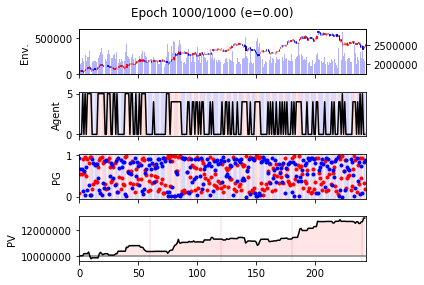

In [15]:
policy_learner = PolicyLearner(
        stock_code=stock_code, chart_data=chart_data, training_data=training_data,
        min_trading_unit=1, max_trading_unit=10, delayed_reward_threshold=.2, lr=.001)
policy_learner.fit(balance=10000000, num_epoches=1000,
                       discount_factor=0, start_epsilon=.5)

print(datetime.datetime.now())
# 정책 신경망을 파일로 저장
model_dir = os.path.join(settings.BASE_DIR, 'models/%s' % stock_code)
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)
model_path = os.path.join(model_dir, 'model_%s.h5' % timestr)
policy_learner.policy_network.save_model(model_path)

print(datetime.datetime.now())

# 두번째 그림은 보유 주식 수및 에이전트 행동 차트